### **Anggota Kelompok 6:**
### **1. Angelica (2540133915)**
### **2. Gabriel Matthew Mintana (2502006253)**
### **3. Sherryl Kurniawan (2540119570)**

# **Import Libraries and Load Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Read datasetnya
pencemaran_udara = pd.read_csv("data.csv", sep = ",")
pencemaran_udara

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,01/01/2021,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53.0,PM25,SEDANG
1,01/02/2021,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47.0,O3,BAIK
2,01/03/2021,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58.0,PM25,SEDANG
3,01/04/2021,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48.0,PM25,BAIK
4,01/05/2021,DKI1 (Bunderan HI),38.0,53.0,24.0,6.0,31.0,9.0,53.0,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
1804,12/27/2021,DKI5 (Kebon Jeruk) Jakarta Barat,54.0,76.0,36.0,14.0,21.0,47.0,76.0,PM25,SEDANG
1805,12/28/2021,DKI5 (Kebon Jeruk) Jakarta Barat,44.0,68.0,20.0,11.0,21.0,33.0,68.0,PM25,SEDANG
1806,12/29/2021,DKI5 (Kebon Jeruk) Jakarta Barat,34.0,54.0,28.0,8.0,25.0,29.0,54.0,PM25,SEDANG
1807,12/30/2021,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,75.0,25.0,15.0,23.0,44.0,75.0,PM25,SEDANG


# **Data Pre-Processing**

## **Data Cleaning**
Pertama-tama kita harus memeriksa apakah terdapat missing value apa tidak. Jika terdapat missing value, hapus data tersebut.

In [ ]:
# Mengecek missing value
mv = pencemaran_udara.isna().sum()
mv

tanggal      0
stasiun      0
pm10        52
pm25        84
so2         98
co          20
o3          52
no2         19
max          1
critical     0
categori     0
dtype: int64

Setelah dicek terdapat missing value, oleh karena itu kita harus menghapus data tersebut.

In [ ]:
# Menghapus misssing value
new_data = pencemaran_udara.dropna()
new_data

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,01/01/2021,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53.0,PM25,SEDANG
1,01/02/2021,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47.0,O3,BAIK
2,01/03/2021,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58.0,PM25,SEDANG
3,01/04/2021,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48.0,PM25,BAIK
4,01/05/2021,DKI1 (Bunderan HI),38.0,53.0,24.0,6.0,31.0,9.0,53.0,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
1804,12/27/2021,DKI5 (Kebon Jeruk) Jakarta Barat,54.0,76.0,36.0,14.0,21.0,47.0,76.0,PM25,SEDANG
1805,12/28/2021,DKI5 (Kebon Jeruk) Jakarta Barat,44.0,68.0,20.0,11.0,21.0,33.0,68.0,PM25,SEDANG
1806,12/29/2021,DKI5 (Kebon Jeruk) Jakarta Barat,34.0,54.0,28.0,8.0,25.0,29.0,54.0,PM25,SEDANG
1807,12/30/2021,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,75.0,25.0,15.0,23.0,44.0,75.0,PM25,SEDANG


In [ ]:
# Mengecek kembali missing value
mv1 = new_data.isna().sum()
mv1

tanggal     0
stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

Setelah dihapus, kita periksa lagi apakah masih ada missing value. Dan setelah dicek sudah tidak ada lagi missing value.

In [ ]:
# Statistics descriptive
new_data.describe()

,pm10,pm25,so2,co,o3,no2,max
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,52.874753,78.238629,35.720501,11.914305,31.338167,20.423204,79.238629
std,14.705020,23.178350,12.627751,4.779081,14.843322,9.458014,22.310143
min,15.000000,13.000000,2.000000,2.000000,8.000000,3.000000,20.000000
25%,45.000000,63.000000,26.000000,9.000000,21.000000,14.000000,64.000000
50%,54.000000,78.000000,36.000000,11.000000,28.000000,19.000000,79.000000
75%,62.000000,92.000000,45.000000,14.000000,38.000000,26.000000,93.000000
max,179.000000,174.000000,82.000000,43.000000,151.000000,65.000000,179.000000


In [ ]:
# Mengubah variabel dependen dari kategori menjadi numerik (Refactor data)
new_data['categori'].replace(['TIDAK SEHAT', 'SEDANG', 'BAIK'],[0, 1, 2], inplace=True)

<ipython-input-7-77752a23b0bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['critical'].replace(['PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2'], [0, 1, 2, 3, 4, 5], inplace = True)
<ipython-input-7-77752a23b0bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['categori'].replace(['TIDAK SEHAT', 'SEDANG', 'BAIK'],[0, 1, 2], inplace=True)


# **Exploratory Data Analysis (EDA)**

<Axes: xlabel='categori', ylabel='count'>

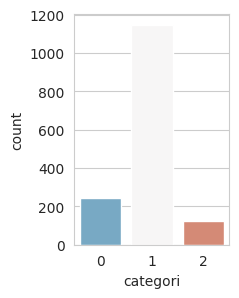

In [ ]:
# Check imbalanced data
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(2, 3))
sns.countplot(x='categori',data=new_data,palette='RdBu_r')

Dapat dilihat bahwa data tidak balanced, namun akan tetap dilakukan prediksi.

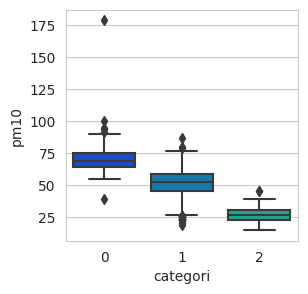

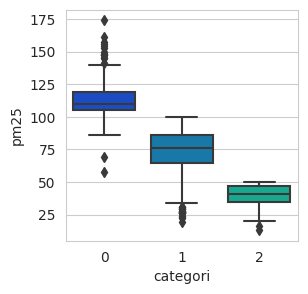

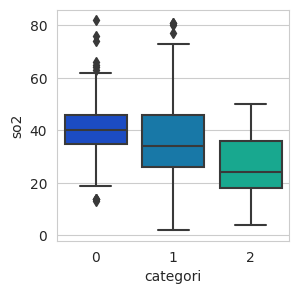

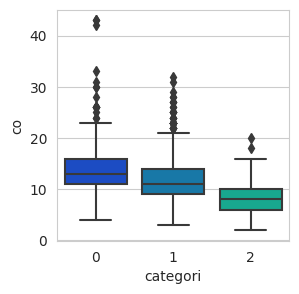

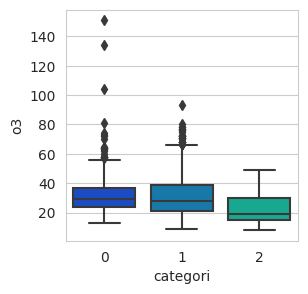

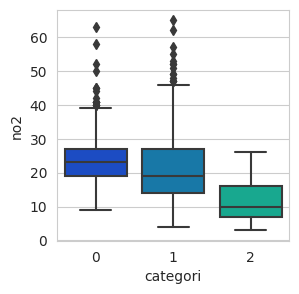

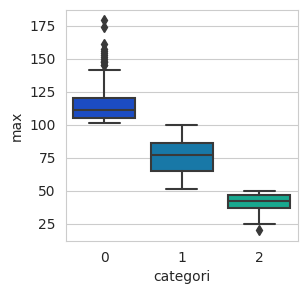

In [ ]:
# Check Outlier
l=list(new_data.columns[2:10])
for i in range(len(l)-1):
    fig, ax = plt.subplots(figsize=(3, 3))
    sns.boxplot(x='categori',y=l[i], data=new_data, palette='winter')
    plt.show()

In [ ]:
# Remove Outlier
def remove_outliers(data):
    # Mengkonversi data menjadi array numpy dengan tipe float
    data = np.array(data, dtype=float)

    # Menghitung IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    cleaned_data = data[(data >= lower_bound) & (data <= upper_bound)]

    return cleaned_data.tolist()

In [ ]:
remove_out = new_data.iloc[:,2:9]
cleaned_data = remove_outliers(remove_out)

<Axes: >

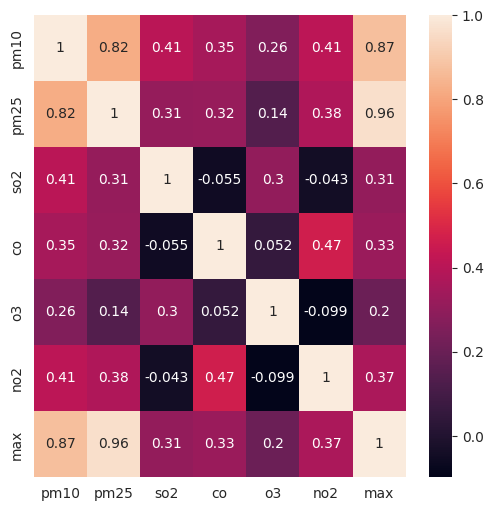

In [ ]:
data_numerik = new_data.iloc[:,2:9]
corr = data_numerik.corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True)

Dari hasil koefisien korelasi menunjukkan bahwa korelasi yang paling kuat adalah antara variabel no3 dan o3. Namun korelasinya adalah korelasi negatif. Hal ini menunjukkan adanya hubungan negatif yang sangat kuat antara variabel no2 dengan variabel o3 dalam analisis. Selain itu juga terdapat kolerasi variabel PM25 dengan variabel max yang nilainya 0.96, maka korelasinya sangat kuat dan bersifat positif.

In [ ]:
from scipy import stats

In [ ]:
chi_square_test = pd.crosstab(new_data['stasiun'], new_data['critical'])
print(chi_square_test)

critical                           0    1  2   4
stasiun                                         
DKI1 (Bunderan HI)                 3  353  6   2
DKI2 (Kelapa Gading)               0  285  4  34
DKI3 (Jagakarsa)                  18  276  8   2
DKI4 (Lubang Buaya)                1  275  2   0
DKI5 (Kebon Jeruk) Jakarta Barat   0  248  0   0


Hipotesis: <br>
H0: tidak ada hubungan antara stasiun dan critical <br>
H1: ada hubungan antara stasiun dan critical <br>
dengan alpha 5% (0.05)

In [ ]:
stats.chi2_contingency(chi_square_test)

Chi2ContingencyResult(statistic=170.97538598415443, pvalue=3.015441806416828e-30, dof=12, expected_freq=array([[  5.27883982, 344.80421885,   4.79894529,   9.11799604],
       [  4.68424522, 305.96638102,   4.25840475,   8.09096902],
       [  4.40870138, 287.9683586 ,   4.00791035,   7.61502966],
       [  4.0316414 , 263.33948583,   3.66512854,   6.96374423],
       [  3.59657218, 234.9215557 ,   3.26961107,   6.21226104]]))

Dikarenakan p-value < alpha maka H0 ditolak sehingga dapat disimpulkan antara stasiun dan critical memiliki hubungan.

# **Training and Prediction**

## **With Outlier**

In [ ]:
X = new_data.iloc[:,2:9]
X.head()

,pm10,pm25,so2,co,o3,no2,max
0,38.0,53.0,29.0,6.0,31.0,13.0,53.0
1,27.0,46.0,27.0,7.0,47.0,7.0,47.0
2,44.0,58.0,25.0,7.0,40.0,13.0,58.0
3,30.0,48.0,24.0,4.0,32.0,7.0,48.0
4,38.0,53.0,24.0,6.0,31.0,9.0,53.0


In [ ]:
Y = new_data.loc[:,['categori']]
Y.head()

,categori
0,1
1,2
2,1
3,2
4,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50, stratify = Y)

### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_neighbors':list(range(1,50))}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=4)
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [ ]:
model.best_params_

{'n_neighbors': 7}

#### **KNN dengan N_Neighbors = 7**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
knn.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
yhat_train = knn.predict(X_train)
yhat_train

array([1, 1, 2, ..., 1, 0, 1])

In [ ]:
cm_train = confusion_matrix(Y_train, yhat_train)
print(cm_train)

[[189   7   0]
 [  2 915   0]
 [  0   6  94]]


In [ ]:
print(classification_report(Y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       196
           1       0.99      1.00      0.99       917
           2       1.00      0.94      0.97       100

    accuracy                           0.99      1213
   macro avg       0.99      0.97      0.98      1213
weighted avg       0.99      0.99      0.99      1213



In [ ]:
yhat_test = knn.predict(X_test)
yhat_test

array([1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,

In [ ]:
cm_test = confusion_matrix(Y_test, yhat_test)
print(cm_test)

[[ 44   5   0]
 [  1 227   2]
 [  0   0  25]]


TP = 296
FN = 1
FP = 7

Sensitivity = 0.99
Specificity

In [ ]:
print(classification_report(Y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        49
           1       0.98      0.99      0.98       230
           2       0.93      1.00      0.96        25

    accuracy                           0.97       304
   macro avg       0.96      0.96      0.96       304
weighted avg       0.97      0.97      0.97       304



#### **KNN dengan N_neighbors = 8**

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = 8)

In [ ]:
knn1.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [ ]:
yhat_train = knn1.predict(X_train)
yhat_train

array([1, 1, 2, ..., 1, 0, 1])

In [ ]:
print(classification_report(Y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       196
           1       0.98      0.99      0.99       917
           2       1.00      0.89      0.94       100

    accuracy                           0.98      1213
   macro avg       0.98      0.95      0.97      1213
weighted avg       0.98      0.98      0.98      1213



In [ ]:
cm_train = confusion_matrix(Y_train, yhat_train)
print(cm_train)

[[190   6   0]
 [  7 910   0]
 [  0  11  89]]


In [ ]:
yhat_test = knn1.predict(X_test)
yhat_test

array([1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1,

In [ ]:
cm_test = confusion_matrix(Y_test, yhat_test)
print(cm_test)

[[ 47   2   0]
 [  4 224   2]
 [  0   1  24]]


In [ ]:
print(classification_report(Y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        49
           1       0.99      0.97      0.98       230
           2       0.92      0.96      0.94        25

    accuracy                           0.97       304
   macro avg       0.94      0.96      0.95       304
weighted avg       0.97      0.97      0.97       304



#### **KNN dengan n_neighbors = 6**

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 6)

In [ ]:
knn2.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [ ]:
yhat_train = knn2.predict(X_train)
yhat_train

array([1, 1, 2, ..., 1, 0, 1])

In [ ]:
cm_train = confusion_matrix(Y_train, yhat_train)
print(cm_train)

[[192   4   0]
 [  8 909   0]
 [  0  12  88]]


In [ ]:
print(classification_report(Y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       196
           1       0.98      0.99      0.99       917
           2       1.00      0.88      0.94       100

    accuracy                           0.98      1213
   macro avg       0.98      0.95      0.96      1213
weighted avg       0.98      0.98      0.98      1213



In [ ]:
yhat_test = knn2.predict(X_test)
yhat_test

array([1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1,

In [ ]:
cm_test = confusion_matrix(Y_test, yhat_test)
print(cm_test)

[[ 46   3   0]
 [  3 225   2]
 [  0   1  24]]


In [ ]:
print(classification_report(Y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        49
           1       0.98      0.98      0.98       230
           2       0.92      0.96      0.94        25

    accuracy                           0.97       304
   macro avg       0.95      0.96      0.95       304
weighted avg       0.97      0.97      0.97       304



### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}

grid_search = GridSearchCV(nb, param_grid, cv=4)
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=4, estimator=GaussianNB(var_smoothing=0.01),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1]})

In [ ]:
print("Best alpha: ", grid_search.best_params_['var_smoothing'])

Best alpha:  0.01


#### **Naive Bayes dengan var_smoothing = 1e-02**

In [ ]:
nb = GaussianNB(priors = None, var_smoothing = 1e-02)
nb.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(var_smoothing=0.01)

In [ ]:
yhat_train = nb.predict(X_train)

In [ ]:
cm_train = confusion_matrix(Y_train, yhat_train)
print(cm_train)

[[170  26   0]
 [  4 879  34]
 [  0   8  92]]


In [ ]:
print(classification_report(Y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       196
           1       0.96      0.96      0.96       917
           2       0.73      0.92      0.81       100

    accuracy                           0.94      1213
   macro avg       0.89      0.92      0.90      1213
weighted avg       0.95      0.94      0.94      1213



In [ ]:
yhat_test = nb.predict(X_test)

In [ ]:
cm_test = confusion_matrix(Y_test, yhat_test)
print(cm_test)

[[ 45   4   0]
 [  2 224   4]
 [  0   2  23]]


In [ ]:
print(classification_report(Y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        49
           1       0.97      0.97      0.97       230
           2       0.85      0.92      0.88        25

    accuracy                           0.96       304
   macro avg       0.93      0.94      0.93       304
weighted avg       0.96      0.96      0.96       304



#### **Naive Bayes dengan var_smoothing = 1e-01**

In [ ]:
nb1 = GaussianNB(priors = None, var_smoothing = 1e-01)
nb1.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(var_smoothing=0.1)

In [ ]:
yhat_train = nb1.predict(X_train)

In [ ]:
cm_train = confusion_matrix(Y_train, yhat_train)
print(cm_train)

[[155  41   0]
 [  0 892  25]
 [  0   7  93]]


In [ ]:
print(classification_report(Y_train, yhat_train))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       196
           1       0.95      0.97      0.96       917
           2       0.79      0.93      0.85       100

    accuracy                           0.94      1213
   macro avg       0.91      0.90      0.90      1213
weighted avg       0.94      0.94      0.94      1213



In [ ]:
yhat_test = nb1.predict(X_test)

In [ ]:
cm_test = confusion_matrix(Y_test, yhat_test)
print(cm_test)

[[ 42   7   0]
 [  1 226   3]
 [  0   2  23]]


In [ ]:
print(classification_report(Y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91        49
           1       0.96      0.98      0.97       230
           2       0.88      0.92      0.90        25

    accuracy                           0.96       304
   macro avg       0.94      0.92      0.93       304
weighted avg       0.96      0.96      0.96       304



#### **Naive Bayes dengan var_smoothing = 1e-03**

In [ ]:
nb2 = GaussianNB(priors = None, var_smoothing = 1e-03)
nb2.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(var_smoothing=0.001)

In [ ]:
yhat_train = nb2.predict(X_train)

In [ ]:
cm_train = confusion_matrix(Y_train, yhat_train)
print(cm_train)

[[172  24   0]
 [  5 879  33]
 [  0   7  93]]


In [ ]:
print(classification_report(Y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       196
           1       0.97      0.96      0.96       917
           2       0.74      0.93      0.82       100

    accuracy                           0.94      1213
   macro avg       0.89      0.92      0.90      1213
weighted avg       0.95      0.94      0.94      1213



In [ ]:
cm_test = confusion_matrix(Y_test, yhat_test)
print(cm_test)

[[ 42   7   0]
 [  1 226   3]
 [  0   2  23]]


In [ ]:
yhat_test = nb2.predict(X_test)

In [ ]:
print(classification_report(Y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.97      0.97      0.97       230
           2       0.85      0.92      0.88        25

    accuracy                           0.95       304
   macro avg       0.91      0.93      0.92       304
weighted avg       0.95      0.95      0.95       304



## **Without Outlier**

In [ ]:
X1 = remove_out.iloc[:,2:9]
X1.head()

,so2,co,o3,no2,max
0,29.0,6.0,31.0,13.0,53.0
1,27.0,7.0,47.0,7.0,47.0
2,25.0,7.0,40.0,13.0,58.0
3,24.0,4.0,32.0,7.0,48.0
4,24.0,6.0,31.0,9.0,53.0


In [ ]:
Y1 = new_data.loc[:,['categori']]
Y1.head()

,categori
0,1
1,2
2,1
3,2
4,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 50, stratify = Y1)

### **KNN**

In [ ]:
knn_wo = KNeighborsClassifier(n_neighbors = 7)

In [ ]:
knn_wo.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
yhat_train = knn_wo.predict(X_train)
yhat_train

array([1, 1, 2, ..., 1, 0, 1])

In [ ]:
cm_train = confusion_matrix(Y_train, yhat_train)
print(cm_train)

[[185  11   0]
 [  2 914   1]
 [  0  12  88]]


In [ ]:
print(classification_report(Y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       196
           1       0.98      1.00      0.99       917
           2       0.99      0.88      0.93       100

    accuracy                           0.98      1213
   macro avg       0.98      0.94      0.96      1213
weighted avg       0.98      0.98      0.98      1213



In [ ]:
yhat_test = knn_wo.predict(X_test)
yhat_test

array([1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1,

In [ ]:
cm_test = confusion_matrix(Y_test, yhat_test)
print(cm_test)

[[ 45   4   0]
 [  3 225   2]
 [  0   0  25]]


In [ ]:
print(classification_report(Y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        49
           1       0.98      0.98      0.98       230
           2       0.93      1.00      0.96        25

    accuracy                           0.97       304
   macro avg       0.95      0.97      0.96       304
weighted avg       0.97      0.97      0.97       304



### **Naive Bayes**

In [ ]:
nb_wo = GaussianNB(priors = None, var_smoothing = 1e-02)
nb_wo.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(var_smoothing=0.01)

In [ ]:
yhat_train = nb_wo.predict(X_train)

In [ ]:
cm_train = confusion_matrix(Y_train, yhat_train)
print(cm_train)

[[170  26   0]
 [  4 879  34]
 [  0   8  92]]


In [ ]:
print(classification_report(Y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       196
           1       0.96      0.96      0.96       917
           2       0.73      0.92      0.81       100

    accuracy                           0.94      1213
   macro avg       0.89      0.92      0.90      1213
weighted avg       0.95      0.94      0.94      1213



In [ ]:
yhat_test = nb_wo.predict(X_test)

In [ ]:
cm_test = confusion_matrix(Y_test, yhat_test)
print(cm_test)

[[ 45   4   0]
 [  2 224   4]
 [  0   2  23]]


In [ ]:
print(classification_report(Y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        49
           1       0.97      0.97      0.97       230
           2       0.85      0.92      0.88        25

    accuracy                           0.96       304
   macro avg       0.93      0.94      0.93       304
weighted avg       0.96      0.96      0.96       304

